In [53]:
######################
#import useful modules
######################
import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *
from Modules_gula import *

########

%matplotlib inline

In [54]:
simul = load(simul = 'gigatl3_1h [2100-200,2100+200,1800-200,1800+200,[1,200,1]] 2540');


depth=-1500

domain = 'zoom'


simulname is None
args (['gigatl3_1h', '[2100-200,2100+200,1800-200,1800+200,[1,200,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2100-200,2100+200,1800-200,1800+200,[1,200,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2100-200,2100+200,1800-200,1800+200,[1,200,1]] [2100
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[1900, 2300, 1600, 2000, array([  1,   2,   3,   4,   5,   6,   7,  

In [58]:
# save computed variables in npy files 

try:
    
    vrt = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'vrt' + '.npy')[0,:,:]
    bvf = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'bvf' + '.npy')[0,:,:]
    Ri = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'Ri' + '.npy')[0,:,:]
    ow = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'ow' + '.npy')[0,:,:]
    pv = np.load('./data_files_py/'  + simul.simul +  format(-depth) +  domain + '_' + 'pv' + '.npy')[0,:,:]

    print('loaded .npy files')
    
except:

    ######
    vrt = var('vrt',simul,depths=[depth],method='old').data / tools.rho2psi(simul.f)
    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'vrt' + '.npy',[vrt])
    
    
    bvf  = var('bvf',simul,depths=[depth]).data
    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'bvf' + '.npy',[bvf])
    
    ######

    dzu = var('dzu',simul,depths=[depth]).data
    dzv  = var('dzv',simul,depths=[depth]).data
    Ri = bvf/((tools.u2rho(dzu)**2 + tools.v2rho(dzv)**2)); del dzu,dzv

    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'Ri' + '.npy',[Ri])

    ######      

    ow = var('ow',simul,depths=[depth]).data   
    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'ow' + '.npy',[ow])
    
    ######      

    pv = var('pv',simul,depths=[depth],method='old').data
    np.save('./data_files_py/' + simul.simul +  format(-depth) +  domain + '_' + 'pv' + '.npy',[pv])
    
    

loaded .npy files


In [59]:
coord = 'km'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'



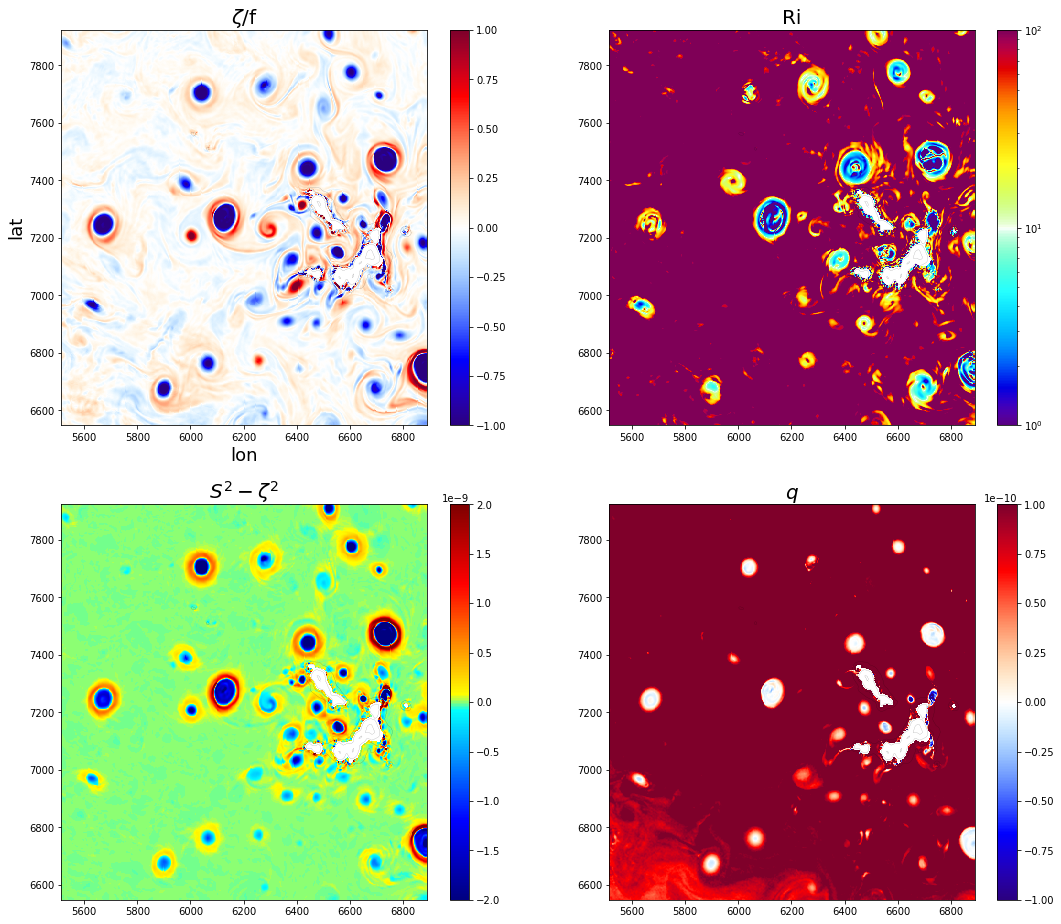

In [62]:
import matplotlib.colors as colors

#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,16.0)) 
ax1 = plt.subplot(2,2,1);

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f', fontsize=20)

###

ax1 = plt.subplot(2,2,2);

plt.pcolormesh(lon,lat,ma.masked_invalid(Ri),\
               cmap = plot.ncview_colormap('jaisnc'),norm=colors.LogNorm(vmin=1.,vmax=100.));
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.title(r'Ri', fontsize=20)

###

ax1 = plt.subplot(2,2,3);
plt.pcolormesh(lon,lat,ma.masked_invalid(ow),\
               cmap = plot.colormap('ageo'),vmin=-0.2e-8,vmax=0.2e-8);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.title(r'$ S^2 - \zeta^2 $', fontsize=20)


###

ax1 = plt.subplot(2,2,4);
plt.pcolormesh(lon,lat,ma.masked_invalid(pv),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1e-10,vmax=1e-10);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 

plt.title(r'$ q$', fontsize=20)

###


plt.savefig(simul.simul + '_zoom_map_vrt_' + format(-depth) +  domain + '.png', size=None, figure=None, bbox_inches='tight',\
            magnification='auto',transparent='true', dpi=300)


/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater


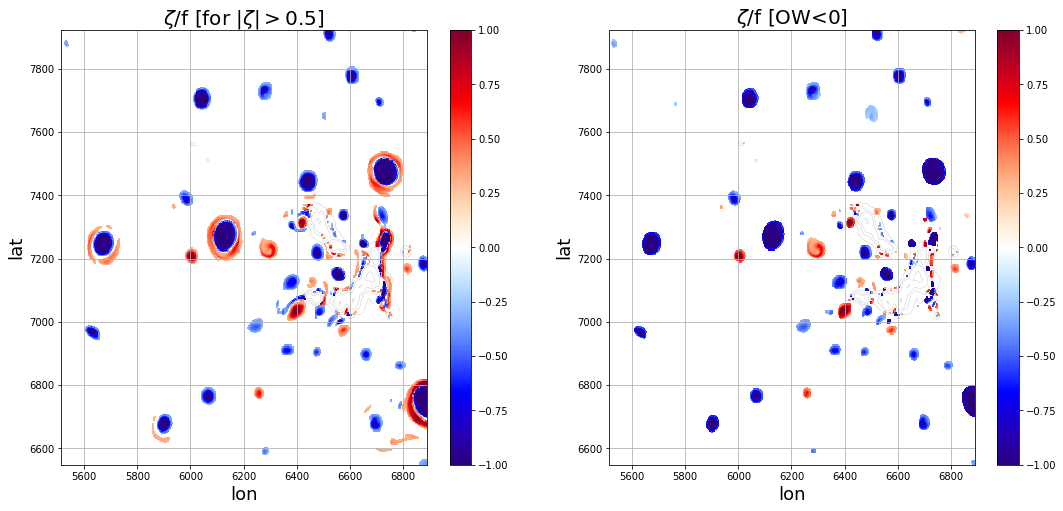

In [64]:
# copy vorticity and Ri
vrtm = tools.psi2rho(vrt)*simul.mask
owm = ow*simul.mask
Rim = Ri*simul.mask

# remove equator
vrtm[np.abs(simul.y)<5] = np.nan
Rim[np.abs(simul.y)<5] = np.nan

# remove values close to topography
#vrtm[(simul.topo<-depth +500)] = np.nan
#Rim[(simul.topo<-depth +500)] = np.nan


#######
# threshold
vrtlim=0.3

# mask values larger than threshold
vrtm_a = copy(vrtm); 
vrtm_c = copy(vrtm); 

# Keep only large vorticity values (> 0.5 f)
vrtm_a[np.abs(vrtm)<vrtlim] = np.nan

# Keep only negative OW values
vrtm_c[owm>-1e-10] = np.nan


#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,8.0)) 
ax1 = plt.subplot(1,2,1);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_a),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [for $|\zeta|>0.5$]', fontsize=20)


###

ax1 = plt.subplot(1,2,2);

plt.pcolormesh(lon,lat,ma.masked_invalid(vrtm_c),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 

plt.grid()   
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f [OW<0]', fontsize=20)

###

plt.savefig(simul.simul + '_map_vrt_ac_' + format(-depth) +  domain + '.png', size=None, figure=None, bbox_inches='tight',\
            magnification='auto',transparent='true', dpi=300)


## Some basic statistics

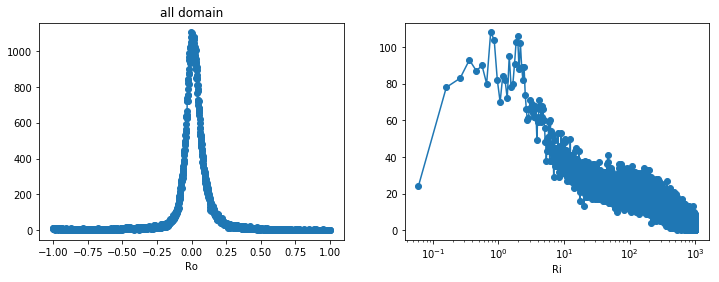

In [65]:
## Stats for Ro and Ri

def normhistogram(u,bins):
    pdf, _ = np.histogram(u,bins)
    #pdf = pdf / ((bins[2]-bins[1])*len(u.ravel()))
    return pdf

#########


fig = plt.figure(figsize=(12.0,4.0)) 

ax1 = plt.subplot(1,2,1);
plt.title('all domain')
bins = np.arange(-1,1,0.001)
pdf = normhistogram(ma.masked_invalid(vrtm),bins)

plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.xlabel('Ro');


#########

ax2 = plt.subplot(1,2,2);
 
bins = np.arange(0.01,1000,0.1)
pdf = normhistogram(ma.masked_invalid(Rim),bins)

plt.semilogx(0.5*(bins[:-1]+bins[1:]),pdf,'-o');
plt.xlabel('Ri'); 

#########


#np.histogram(Ri[vrt<-0.5])







/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


256 256


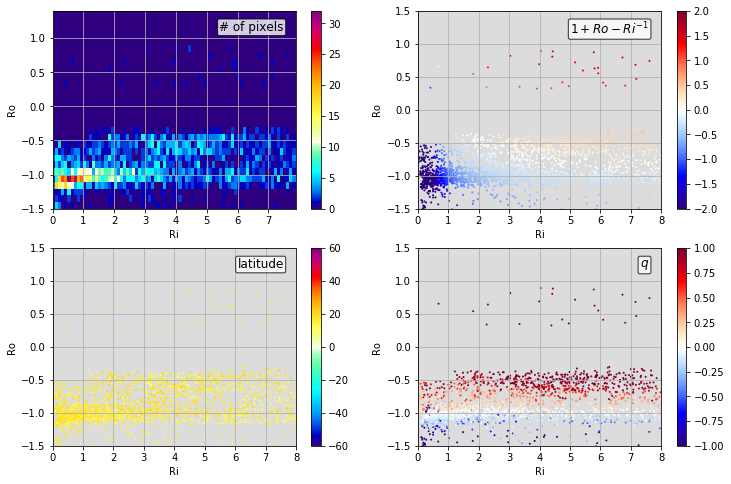

In [67]:
#Scatter plot!


vrtm = tools.psi2rho(vrt)*simul.mask
Rim = Ri*simul.mask
pvm = tools.psi2rho(pv)*simul.mask/simul.f
owm = ow*simul.mask

vrtm[np.abs(simul.y)<5] = np.nan
Rim[np.abs(simul.y)<5] = np.nan
pvm[np.abs(simul.y)<5] = np.nan

#vrtm[(simul.topo<-depth +500)] = np.nan
#Rim[(simul.topo<-depth +500)] = np.nan

#vrtlim=0.2
#Rim[np.abs(vrtm)<vrtlim] = np.nan
#vrtm[np.abs(vrtm)<vrtlim] = np.nan
#pvm[np.abs(vrtm)<vrtlim] = np.nan

# Keep only negative OW values
vrtm[owm>-1e-10] = np.nan
Rim[owm>-1e-10] = np.nan
pvm[owm>-1e-10] = np.nan


qm = 1 + vrtm - 1./Rim

#################

box = 'round,pad=0.15'; props = dict(boxstyle=box, fc='w', ec='k', lw=1, alpha=0.8)


#########
fig = plt.figure(figsize=(12.0,8.0)) 


ax1 = plt.subplot(2,2,1);

levelsvar = np.linspace(-3,3,100)
xedges = np.arange(0,8,0.1)
yedges = np.arange(-1.5,1.5,0.1)
H, xedges, yedges = np.histogram2d(Rim.ravel(), vrtm.ravel(), bins=(xedges, yedges)); H = H.T
X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(X, Y, ma.masked_invalid(H),cmap = plot.ncview_colormap_asym('jaisnd')); plt.colorbar()
plt.xlabel('Ri'); plt.ylabel('Ro'); plt.grid()
ax1.text(.95,.95,'# of pixels', fontsize=12,  horizontalalignment='right', verticalalignment='top',\
         bbox=props, transform=ax1.transAxes)

#########

ax4 = fig.add_subplot(223,facecolor='Gainsboro')

plt.scatter(Rim, vrtm, s=4.,marker='o',c=simul.y, cmap= plot.ncview_colormap('jaisnd'),\
            edgecolors='none',alpha=1,vmin=-60, vmax=60)
plt.colorbar()
plt.xlabel('Ri'); plt.ylabel('Ro'); plt.grid()
plt.axis([0,8,-1.5,1.5])
ax4.text(.95,.95,'latitude', fontsize=12,  horizontalalignment='right', verticalalignment='top',\
         bbox=props, transform=ax4.transAxes)



#########
levelsvar = np.linspace(-1,1,100)*2

#ax2 = plt.subplot(2,2,2);
ax2 = fig.add_subplot(222,facecolor='Gainsboro')
plt.scatter(Rim, vrtm, s=4.,marker='o',c=qm, cmap= plot.ncview_colormap('blu_red'),\
            edgecolors='none',alpha=1,vmin=np.min(levelsvar), vmax=np.max(levelsvar))
plt.colorbar()
plt.xlabel('Ri'); plt.ylabel('Ro'); plt.grid()
plt.axis([0,8,-1.5,1.5])
ax2.text(.95,.95,'$1+ Ro - Ri^{-1}$', fontsize=12,  horizontalalignment='right', verticalalignment='top',\
         bbox=props, transform=ax2.transAxes)


#########
levelspv = np.linspace(-1,1,100)

ax3 = fig.add_subplot(224,facecolor='Gainsboro')

plt.scatter(Rim, vrtm, s=4.,marker='o',c=pvm*1e6, cmap= plot.ncview_colormap('blu_red'),\
            edgecolors='none',alpha=1,vmin=np.min(levelspv), vmax=np.max(levelspv))
plt.colorbar()
plt.xlabel('Ri'); plt.ylabel('Ro'); plt.grid()
plt.axis([0,8,-1.5,1.5])
ax3.text(.95,.95,'$q$', fontsize=12,  horizontalalignment='right', verticalalignment='top',\
         bbox=props, transform=ax3.transAxes)



plt.savefig(simul.simul + '_scatter_' + format(-depth) +  domain + '.png', size=None, figure=None, bbox_inches='tight',\
            magnification='auto',transparent='true', dpi=300)




# Look at some individual vortices

simulname is None
args (['gigatl3_1h', '[2072,2132,2008,2068,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2072,2132,2008,2068,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2072,2132,2008,2068,[1,300,1]] [2072
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[2072, 2132, 2008, 2068, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  1

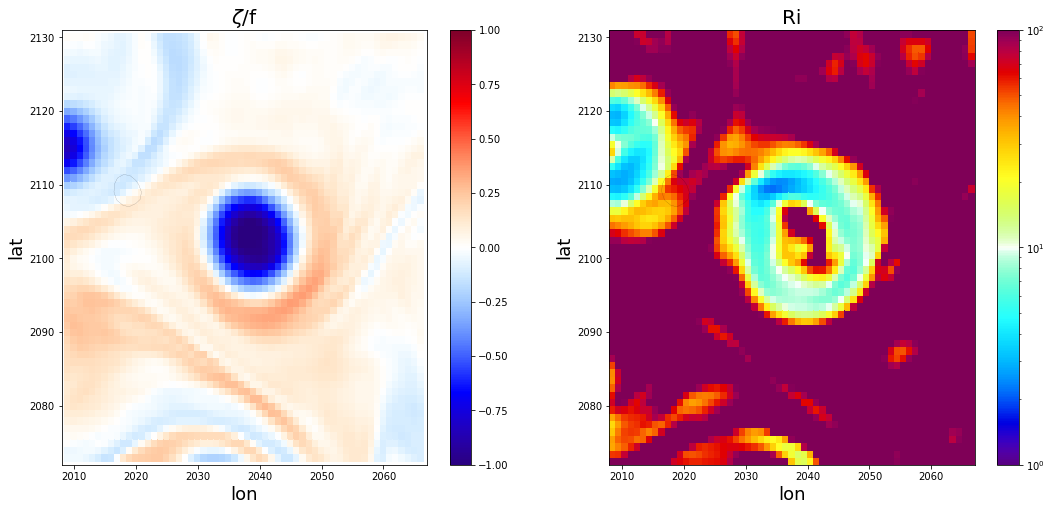

In [28]:


vortices = [[671,2594],[2010,2470],[2263,2910],[2000,1957],[1950,2170],[2038,2102]]
depths_vortices = [-1500,-1500,-1500,-1500,-1500,-1500,-1500]


ivort = 5
depth = depths_vortices[ivort]

domain = 'vortex' + format(ivort)

#########

simul = load(simul = simulname + ' [' + format(vortices[ivort][1]-30) + ',' + format(vortices[ivort][1]+30)\
                               +  ',' + format(vortices[ivort][0]-30) + ',' + format(vortices[ivort][0]+30)\
                                      +',[1,300,1]] ' + format(time));


vrt = var('vrt',simul,depths=[depth],method='old').data / tools.rho2psi(simul.f)

###

bvf  = var('bvf',simul,depths=[depth]).data
dzu = var('dzu',simul,depths=[depth]).data
dzv  = var('dzv',simul,depths=[depth]).data
Ri = bvf/((tools.u2rho(dzu)**2 + tools.v2rho(dzv)**2)); del dzu,dzv

###

[lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
lon,lat = lon.T,lat.T

######


import matplotlib.colors as colors

#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(18.0,8.0)) 
ax1 = plt.subplot(1,2,1);

plt.pcolormesh(tools.rho2psi(lon),tools.rho2psi(lat),ma.masked_invalid(vrt),\
               cmap = plot.ncview_colormap('blu_red'),vmin=-1.,vmax=1.);
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 
    
#plt.axis([vortices[ivort][0]-20,vortices[ivort][0]+20,vortices[ivort][1]-20,vortices[ivort][1]+20])
    
plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f', fontsize=20)


###

ax1 = plt.subplot(1,2,2);

plt.pcolormesh(lon,lat,ma.masked_invalid(Ri),\
               cmap = plot.ncview_colormap('jaisnc'),norm=colors.LogNorm(vmin=1.,vmax=100.));
plt.colorbar()
CS1 = plt.contour(lon,lat,simul.topo,[100,1000,2000,3000],colors = ('k',), linewidths = (.1,)); 
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ; 


plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'Ri', fontsize=20)

###

plt.savefig(simul.simul + '_zoom_map_vrt_' + format(-depth) +  domain + '.png', size=None, figure=None, bbox_inches='tight',\
            magnification='auto',transparent='true', dpi=300)


# Vertical sections

In [29]:
def rankine(r,rm,vm):
    v = copy(r)
    v = vm* r/rm
    v[np.abs(r)>rm] = vm* (r[np.abs(r)>rm]/rm)**(-1)
    return v



def gaussian(r,rm,vm):
    v = copy(r)
    v = vm* r/rm * np.exp(-r**2/(2*rm**2)) / np.exp(-1/2)
    return v

simulname is None
args (['gigatl3_1h', '[2097,2107,2008,2068,[1,300,1]]', '2540'],)
args[0] ['gigatl3_1h', '[2097,2107,2008,2068,[1,300,1]]', '2540']
len(args[0]) 3
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [2097,2107,2008,2068,[1,300,1]] [2097
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/gigatl3_grd.nc
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
dt
dt is read in  /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL3/GIGATL3_1h/GIGATL3_12h_inst_2007-07-08-2007-07-12.nc
[2097, 2107, 2008, 2068, array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  1

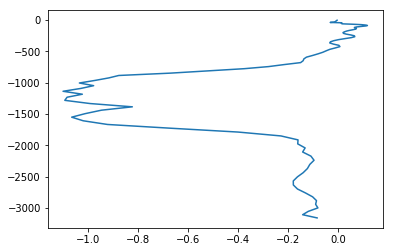

In [30]:
ix = 30; iy = 5

simul = load(simul = simulname + ' [' + format(vortices[ivort][1]-iy) + ',' + format(vortices[ivort][1]+iy)\
                               +  ',' + format(vortices[ivort][0]-ix) + ',' + format(vortices[ivort][0]+ix)\
                                      +',[1,300,1]] ' + format(time));




#################################################
#Compute vertical coordinates
#################################################

[z_r,z_w] = tools.get_depths(simul)

# define z
[_,_,z] =np.mgrid[0:z_r.shape[0],0:z_r.shape[1],0:z_r.shape[2]]

# define lon in 3d
lat3d = copy(z_r)
for iz in range(lat3d.shape[2]):
    lat3d[:,:,iz] = np.cumsum(1./(simul.pm)*1e-3,axis=0)


#################################################

vrt = (var('vrt',simul).data.T / tools.rho2psi(simul.f).T ).T

buoy = var('buoy',simul).data


#################################################


plt.plot(vrt[ix,iy,:],tools.rho2psi(z_r)[ix,iy,:])




/home/gula/.virtualenvs/croco/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


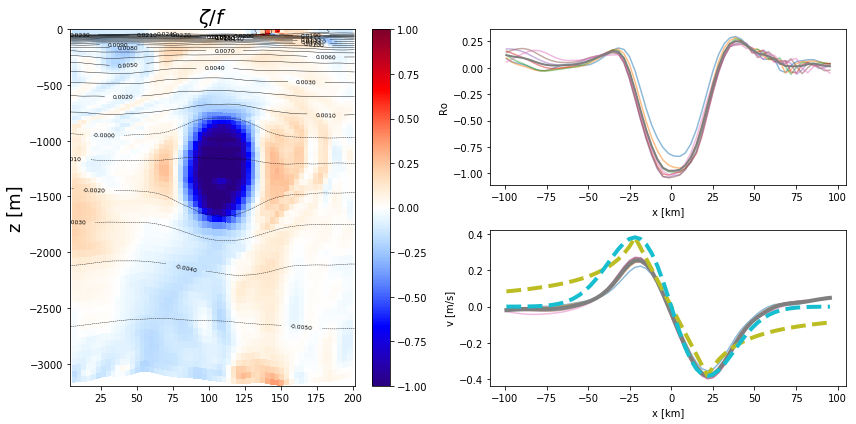

In [31]:


#################################################
# Plot  data
#################################################
levels = np.arange(-1.,1.01,0.01)*1.
my_cmap=plot.ncview_colormap('blu_red')


#################################################
# Plot  data
#################################################

fig = plt.figure(figsize=(12.0,6.0))
fig.set_tight_layout(1.)

###################

ax1 = plt.subplot(1,2,1);
plt.pcolormesh(tools.rho2psi(lat3d)[:,iy,:], tools.rho2psi(z_r)[:,iy,:],
                vrt[:,iy,:], vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap); plt.colorbar()
#CS1 = plt.contour(lat3d[:,iy,:],z_r[:,iy,:],np.max(z) - z[:,iy,:],range(300),colors = ('k',), linewidths = (0.2,));
#plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

CS2 = plt.contour(lat3d[:,iy,:],z_r[:,iy,:],buoy[:,iy,:],np.arange(-3,1,0.001),colors = ('k',), linewidths = (0.4,));
plt.clabel(CS2, fmt = '%1.4f', colors = 'k', fontsize=6)  ;

plt.ylabel(r'z [m]',fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)
#plt.xlim([37.5,40])

##################

vrtz = (var('vrt',simul,depths=[-1500]).data.T / tools.rho2psi(simul.f).T ).T
v = tools.rho2u(var('v',simul,depths=[-1500]).data)

imax = np.nanargmax(np.mean(v[:,1:-1],axis=1))
imin = np.nanargmin(np.mean(v[:,1:-1],axis=1))
                    
r = tools.rho2psi(lat3d)[:,iy,0]
r -= (r[imin] + r[imax])/2

rm = r[np.nanargmin(np.mean(v[:,1:-1],axis=1))];
vm = np.nanmin(np.mean(v[:,1:-1],axis=1))

##################


ax3 = plt.subplot(2,2,2);

plt.plot(r,vrtz[:,1:-1],alpha=0.5)
plt.plot(r,np.mean(vrtz[:,1:-1],axis=1),linewidth=2.)

plt.ylabel('Ro')
plt.xlabel('x [km]')

##################

ax4 = plt.subplot(2,2,4);

plt.plot(r,v[:,1:-1],alpha=0.5)
plt.plot(r,np.mean(v[:,1:-1],axis=1),linewidth=4.)

plt.plot(r,rankine(r,rm,vm),'--',linewidth=4.)
plt.plot(r,gaussian(r,rm,vm),'--',linewidth=4.)

plt.ylabel('v [m/s]')
plt.xlabel('x [km]')

###################

plt.savefig(simul.simul + '_zoom_map_vrt_'  +  domain + '.png', size=None, figure=None,bbox_inches='tight', magnification='auto',transparent='true', dpi=150)


